# My Data Set : Titanic data

I have choosen the Titanic Data because the Titanic was one of my strongest fantasys when i was young. I actually did 
a small investigation with a map and the information available about it sinking circunstances and I was pretty sure that i had a good grip on the location for when i was older :-) .
When, I grew older and i wont be able to deep dive the Titanic waters and abysm but I will try to get into the waters of its dataset to find out it some secrets.

## Initial review of the set and questions

I will start by taking a look at the data, an initial "how-it-feels" look at the data.
Will start setting up required libraries and exporting the CSV. 
Then, I will formulate the questions.

In [2]:
filename = 'titanic-data.csv'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#################################################
# Initial "head" review of the DS.
# Want a clear table representation of the whole data initially 
# so i will import it into a pd DataFrame first
#################################################

titanic_df = pd.read_csv(filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Getting additional info about the DS

OK, it looks great. The Titanic dataset contain Name of passengers and some demographic data about them (age, sex) along with specific data related with the Titanic trip (and tragedy). The id of the data is a 'PassengerId' field. There are some columns that I did not fully understand the meaning (SibSp, Parch) so I will check out the source of this data to find out more info [Kaggle site] (https://www.kaggle.com/c/titanic/data)

Find the following information about some the dataset fields from kaggle:

*Data Dictionary*

*Variable	Definition	Key*
*survival	Survival	0 = No, 1 = Yes*
*pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd*
*sex	Sex*
*Age	Age in years*
*sibsp	# of siblings / spouses aboard the Titanic*	
*parch	# of parents / children aboard the Titanic*	
*ticket	Ticket number*
*fare	Passenger fare*	
*cabin	Cabin number*	
*embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton*
*Variable Notes*

*pclass: A proxy for socio-economic status (SES)*
*1st = Upper*
*2nd = Middle*
*3rd = Lower*

*age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5*

*sibsp: The dataset defines family relations in this way...*
*Sibling = brother, sister, stepbrother, stepsister*
*Spouse = husband, wife (mistresses and fiancés were ignored)*

*parch: The dataset defines family relations in this way...*
*Parent = mother, father*
*Child = daughter, son, stepdaughter, stepson*
*Some children travelled only with a nanny, therefore parch=0 for them.*

## Time for questions

One of the reassons the Titanic tragedy is so attractive is , from my point of view, that it happenedh so close with the WW I that it seems to anticipate what it happened there : not matter your social class , a tragedy will hit us all.

So I will start trying to understand if that is true. I will separate the titanic_df dataset in two different pandas ds : one with survivors and one with non-survivors. Then i will explore survivors by class. I will also want to know if people travelling in different clasess have significantly differences in demographic composition (around same age ? sex distribution ?). So I will formulate the questions more clearly :

**1) What is the ratio of survived/non survived in 1st class passengers vs 2nd and 3rd class passengers ?**

**2) What is the difference in age and sex composition for survived and non survived passengers ?**

Will start there; probably initial answers will call for additional questions later

In [22]:
############################################################
# We'll start by separate the dataset in 2 new DS one for
# survivers and other for non survivers
############################################################

non_survived_df = titanic_df[titanic_df.Survived == 0] # Survived = 0 means 'NO' in the Titanic DS
survived_df = titanic_df[titanic_df.Survived == 1]     # Survived = 1 means 'YES' in the Titanic DS

# Check if both new DS sum up to the total count of complete DS

titanic_df['Survived'].count() == non_survived_df['Survived'].count() + survived_df['Survived'].count() # This should be 'True'

True

OK, now we have 2 new DS's with information separated by the value of the 'Survived' field.
Lets group and compute stats based on 'Pclass' which has information about the passenger class

OK, sum of field Pclass is ready to be analyzed. Number of records: 549


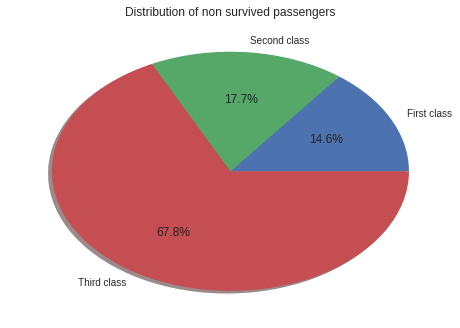

In [60]:
#############################################################
# Check if passenger distribution sum up to total of Pclass field
#############################################################

total_non_survived = non_survived_df['Pclass'].count()
total_non_survived_first_class = non_survived_df[non_survived_df.Pclass == 1]['Pclass'].count()
total_non_survived_second_class = non_survived_df[non_survived_df.Pclass == 2]['Pclass'].count()
total_non_survived_third_class = non_survived_df[non_survived_df.Pclass == 3]['Pclass'].count() 

if total_non_survived == total_non_survived_first_class + total_non_survived_second_class + total_non_survived_third_class:
    print 'OK, sum of field Pclass is ready to be analyzed. Number of records: {}'.format(total_non_survived)
else:
    print 'Review Pclass field for NaN or any non numeric value'

# Now lets plot a pie with the distribution in % of thos 549 non survived passengers

non_survived_per_class = non_survived_df['Pclass'].values

labels = 'First class', 'Second class', 'Third class'
non_survived = [total_non_survived_first_class, total_non_survived_second_class, total_non_survived_third_class ]
plt.title('Distribution of non survived passengers')
plt.pie(non_survived, labels=labels ,autopct='%1.1f%%', shadow=True)
plt.show()


OK, sum of field Pclass is ready to be analyzed. Number of records: 342


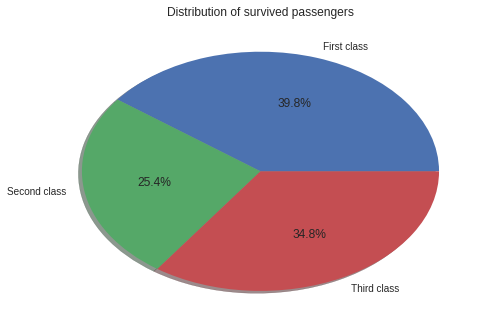

In [63]:
#############################################################
# Now moving to survived data
# Check if passenger distribution sum up to total of Pclass field
#############################################################

total_survived = survived_df['Pclass'].count()
total_survived_first_class = survived_df[survived_df.Pclass == 1]['Pclass'].count()
total_survived_second_class = survived_df[survived_df.Pclass == 2]['Pclass'].count()
total_survived_third_class = survived_df[survived_df.Pclass == 3]['Pclass'].count() 

if total_survived == total_survived_first_class + total_survived_second_class + total_survived_third_class:
    print 'OK, sum of field Pclass is ready to be analyzed. Number of records: {}'.format(total_survived)
else:
    print 'Review Pclass field for NaN or any non numeric value'

# Now lets plot a pie with the distribution in % of thos 549 non survived passengers

survived_per_class = survived_df['Pclass'].values

labels = 'First class', 'Second class', 'Third class'
survived = [total_survived_first_class, total_survived_second_class, total_survived_third_class ]
plt.title('Distribution of survived passengers')
plt.pie(survived, labels=labels ,autopct='%1.1f%%', shadow=True)
plt.show()


OK, now we will review the distribution of age and sex for survived and non survived DSs

We'll start reviewing Age distribution

First we'll check if all the records have values or NaN so we can "clean" the dataset
of non numeric values before get into obtaining statistics.

In [90]:
print 'There are any NaN in the non_survived DS column Age ? {}'.format(np.isnan(non_survived_df['Age']).any())
print 'There are any NaN in the survived DS column Age ? {}'.format(np.isnan(survived_df['Age']).any())


There are any NaN in the non_survived DS column Age ? True
There are any NaN in the survived DS column Age ? True


In [84]:
##################################################################
# Since this result in 'True' , we'll need to clean up NaN
# and move records with age to a new array for non_survived_df
# and survived_df
##################################################################

non_survived_nanfree_age_array = np.asarray([ age for age in non_survived_df['Age'] if not np.isnan(age) ])
survived_nanfree_age_array = np.asarray([ age for age in survived_df['Age'] if not np.isnan(age) ])

print 'There are NaNs in new array for non survived ?: {}'.format(np.isnan(non_survived_nanfree_age_array).any())
print 'There are NaNs in new array for survived ?: {}'.format(np.isnan(survived_nanfree_age_array).any())

There are NaNs in new array for non survived ?: False
There are NaNs in new array for survived ?: False


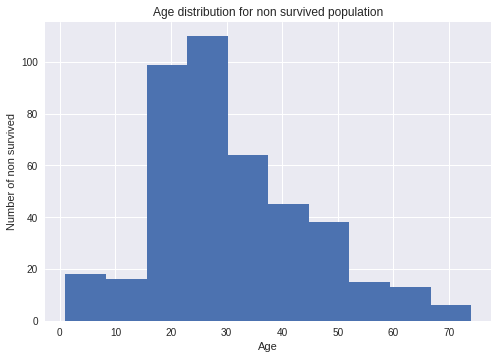

In [88]:
##################################################################
# Describe statistics for non survived population
# 
##################################################################

plt.xlabel('Age')
plt.ylabel('Number of non survived')
plt.title('Age distribution for non survived population')
plt.hist(non_survived_nanfree_age_array)
plt.show()

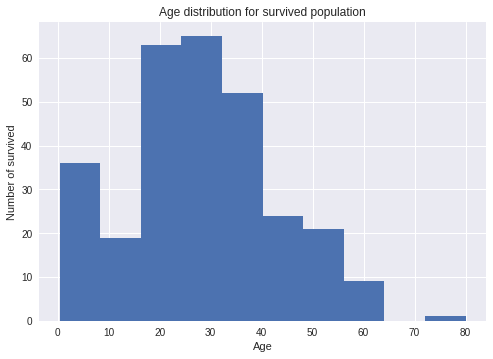

In [89]:
##################################################################
# Describe statistics for survived population
# 
##################################################################

plt.xlabel('Age')
plt.ylabel('Number of survived')
plt.title('Age distribution for survived population')
plt.hist(survived_nanfree_age_array)
plt.show()

Lets review the Sex distribution

First we'll check if all the records have values or NaN so we can "clean" the dataset
of non numeric values before get into obtaining statistics.

In [102]:
total_survived_sex = survived_df['Sex'].count()
total_survived_male = survived_df[survived_df.Sex == 'male']['Sex'].count()
total_survived_female = survived_df[survived_df.Sex == 'female']['Sex'].count()

total_non_survived_sex = non_survived_df['Sex'].count()
total_non_survived_male = non_survived_df[non_survived_df.Sex == 'male']['Sex'].count()
total_non_survived_female = non_survived_df[non_survived_df.Sex == 'female']['Sex'].count()



if total_survived_sex == total_survived_male + total_survived_female:
    print 'OK, sum of field Sex for survived passengers is ready to be analyzed. Number of records: {}'.format(total_survived_sex)
else:
    print 'Review Sex field for NaN or any non numeric value'
    
if total_non_survived_sex == total_non_survived_male + total_non_survived_female:
    print 'OK, sum of field Sex for non survived passengers is ready to be analyzed. Number of records: {}'.format(total_non_survived_sex)
else:
    print 'Review Sex field for NaN or any non numeric value'



OK, sum of field Sex for survived passengers is ready to be analyzed. Number of records: 342
OK, sum of field Sex for non survived passengers is ready to be analyzed. Number of records: 549


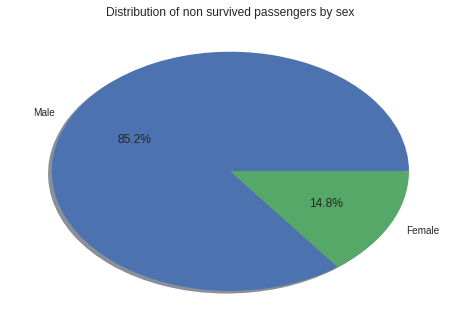

In [101]:
############################################################################

# Now lets plot a pie with the distribution in % of those 549 non survived passengers

non_survived_per_sex = non_survived_df['Sex'].values

labels = 'Male', 'Female'
non_survived = [total_non_survived_male, total_non_survived_female]
plt.title('Distribution of non survived passengers by sex')
plt.pie(non_survived, labels=labels ,autopct='%1.1f%%', shadow=True)
plt.show()


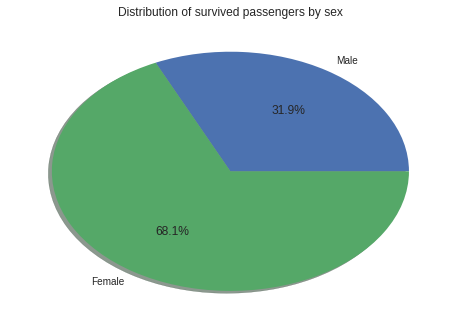

In [103]:
############################################################################

# Now lets plot a pie with the distribution in % of those 342 non survived passengers

survived_per_sex = survived_df['Sex'].values

labels = 'Male', 'Female'
survived = [total_survived_male, total_survived_female]
plt.title('Distribution of survived passengers by sex')
plt.pie(survived, labels=labels ,autopct='%1.1f%%', shadow=True)
plt.show()

# Findings

1. Distribution of non survived / survived by passenger class
    - This dataset shows that passenger of third class represented almost 70% of non survived passengers but only 35 % of survived passengers. In the case of first class passengers the proportion has an inverse result : percentage of survived first class passengers almost duplicate the percentage of non survived.
2. Distribution of non survived / survived by passenger age
    - In this analysis we found similar distributions between survived and no survived but with a nice surprise in the data : the number of survived passengers between 0 and 10 years is almost the double of non survived.    - 
3. Distribution of non survived / survived by passenger sex
    - In this last point we found the most clear difference between both distributions : 85% of non survived passengers were male , but only 32% of those survived so given point 2 and 3 one could speculate that "woman and kids first" seems to be reflected in these datasets.
    
It would we important to contrast this information with the total population of the ship to understand male/female proportions as well as initial proportion of first/second/third class passengers to put this results in the correct perspective.

### References
- [Jupyter markdown reference] https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb

- numpy_pandas_cheatsheet.pdf
- [kaggle titanic data ref] https://www.kaggle.com/c/titanic/data
- [numpy doc] https://docs.scipy.org/doc/
- [pandas doc] http://pandas.pydata.org/pandas-docs/stable/
- [datacarpentry.org entry on slicing datasets] http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/02-index-slice-subset.html
- [matplotlib doc] https://matplotlib.org/2.0.2/index.html
- [stackoverflow on NaN] https://stackoverflow.com/questions/911871/detect-if-a-numpy-array-contains-at-least-one-non-numeric-value
- [stackoverflow on NaN] https://stackoverflow.com/questions/28310332/simpler-way-to-filter-out-nan-or-invalids-in-python-array-or-a-numpy-array